In [59]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [82]:
df = pd.read_csv("Data.csv")
df
dff = df.iloc[:, 1:-1]

In [61]:
df.isnull().sum()
# No null values

,0
Sample code number,0
Clump Thickness,0
Uniformity of Cell Size,0
Uniformity of Cell Shape,0
Marginal Adhesion,0
Single Epithelial Cell Size,0
Bare Nuclei,0
Bland Chromatin,0
Normal Nucleoli,0
Mitoses,0


In [62]:
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [63]:
df['Class'].value_counts()

,count
Class,
2,444
4,239


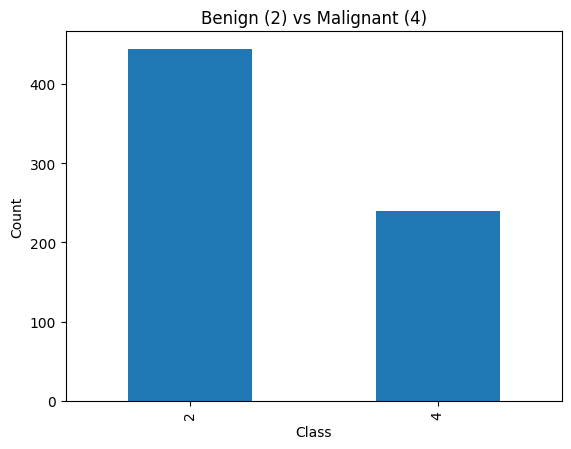

In [64]:
df['Class'].value_counts().plot(kind='bar')
plt.title('Benign (2) vs Malignant (4)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
# Benign tumors are non cancerous
# Malignant tumors are cancerous

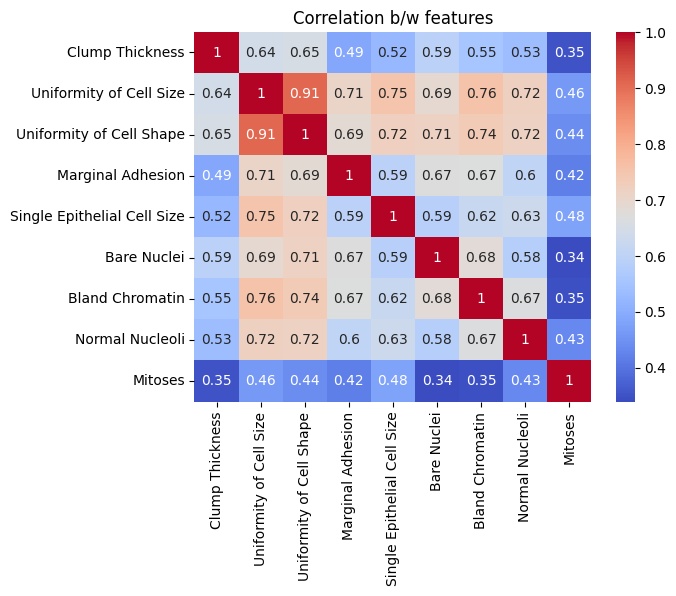

'\n+1: Perfect positive correlation\n\n0: No correlation\n\n-1: Perfect negative correlation\n'

In [84]:
# Checking how correlated the features aree
sns.heatmap(dff.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation b/w features")
plt.show()
"""
+1: Perfect positive correlation

0: No correlation

-1: Perfect negative correlation
"""

In [65]:
# Feature and dependent vector seperation
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [67]:
# Scaling the features.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [68]:
# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

logistic = LogisticRegression()
svc = SVC(kernel='linear', random_state=0)
svc_r = SVC(kernel='rbf', random_state=0)
tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
bayes = GaussianNB()
KNN = KNeighborsClassifier(n_neighbors= 5, metric='minkowski', p=2)

In [69]:
# Logistic regression
logistic.fit(X_train, y_train)
y_log = logistic.predict(X_test)
cm_log = confusion_matrix(y_log, y_test)
ac_log = accuracy_score(y_log, y_test)
print(cm_log)
print(ac_log)

[[84  3]
 [ 3 47]]
0.9562043795620438


In [70]:
# K-Nearest Neighbor
KNN.fit(X_train, y_train)
y_knn = KNN.predict(X_test)
cm_knn = confusion_matrix(y_knn, y_test)
ac_knn = accuracy_score(y_knn, y_test)
print(cm_knn)
print(ac_knn)

[[83  2]
 [ 4 48]]
0.9562043795620438


In [73]:
# Support vector machine (Linear kernel)
svc.fit(X_train, y_train)
y_svc = svc.predict(X_test)
cm_svc = confusion_matrix(y_svc, y_test)
ac_svc = accuracy_score(y_svc, y_test)
print(cm_svc)
print(ac_svc)

[[83  2]
 [ 4 48]]
0.9562043795620438


In [74]:
# Support vector machine (RBF kernel)
svc_r.fit(X_train, y_train)
y_svcr = svc_r.predict(X_test)
cm_svcr = confusion_matrix(y_svcr, y_test)
ac_svcr = accuracy_score(y_svcr, y_test)
print(cm_svcr)
print(ac_svcr)

[[82  1]
 [ 5 49]]
0.9562043795620438


In [76]:
# Naive Bayes
bayes.fit(X_train, y_train)
y_bayes= bayes.predict(X_test)
cm_bayes = confusion_matrix(y_bayes, y_test)
ac_bayes = accuracy_score(y_bayes, y_test)
print(cm_bayes)
print(ac_bayes)

[[80  0]
 [ 7 50]]
0.948905109489051


In [77]:
# Decision tree (Classification tree)
tree.fit(X_train, y_train)
y_tree = tree.predict(X_test)
cm_tree = confusion_matrix(y_tree, y_test)
ac_tree = accuracy_score(y_tree, y_test)
print(cm_tree)
print(ac_tree)

[[84  3]
 [ 3 47]]
0.9562043795620438


In [79]:
# Random forest
forest.fit(X_train, y_train)
y_forest = forest.predict(X_test)
cm_forest = confusion_matrix(y_forest, y_test)
ac_forest = accuracy_score(y_forest, y_test)
print(cm_forest)
print(ac_forest)

[[83  3]
 [ 4 47]]
0.948905109489051


<ipython-input-107-386b9bf0297d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=false_negatives, palette="Blues")


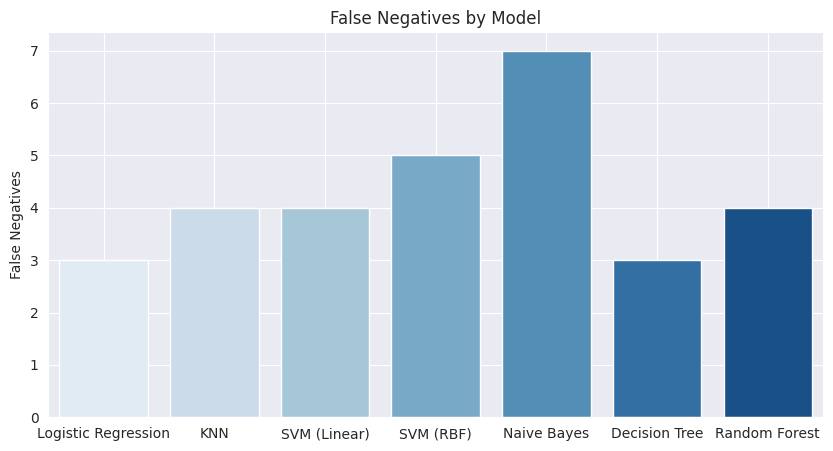

In [107]:
# Visualization of false negatives of each model
models = ["Logistic Regression", "KNN", "SVM (Linear)", "SVM (RBF)",
          "Naive Bayes", "Decision Tree", "Random Forest"]
false_negatives = [3, 4, 4, 5, 7, 3, 4]
sns.set_style("darkgrid")

plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=false_negatives, palette="Blues")
plt.title("False Negatives by Model")
plt.ylabel("False Negatives")
plt.grid(True)
plt.show()

<ipython-input-104-d3f3865f2110>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="Reds")


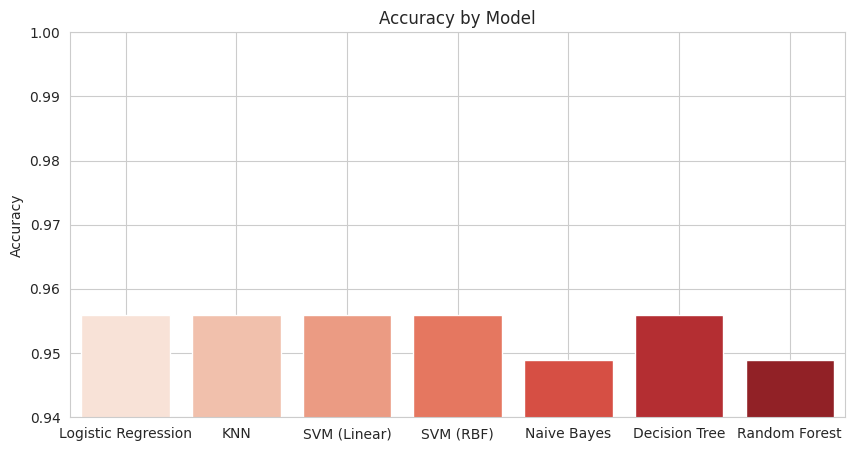

In [104]:
# visualization of all models accuracies
models = ["Logistic Regression", "KNN", "SVM (Linear)", "SVM (RBF)",
          "Naive Bayes", "Decision Tree", "Random Forest"]
accuracies = [0.956, 0.956, 0.956, 0.956, 0.949, 0.956, 0.949]
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=accuracies, palette="Reds")
plt.title("Accuracy by Model")
plt.ylabel("Accuracy")
plt.ylim(0.94, 1.0) # to kind of zoom out the graph
plt.grid(True)
plt.show()
